In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

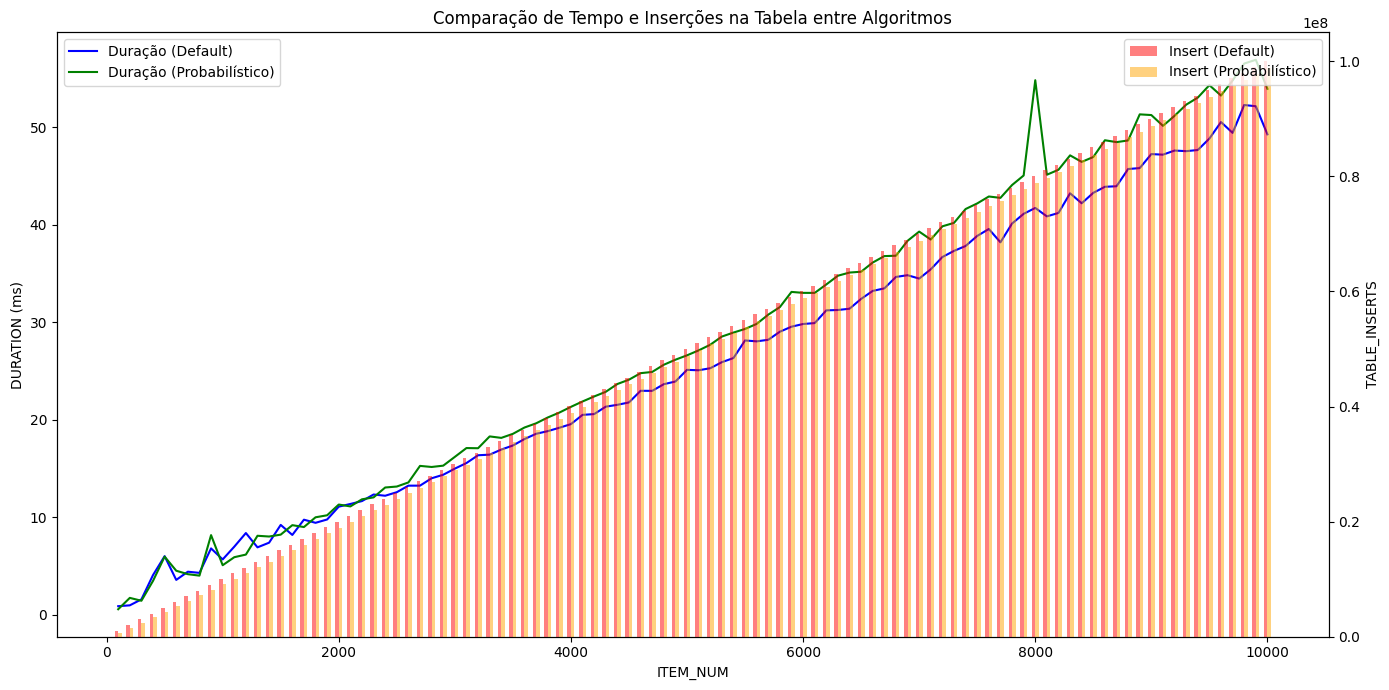

In [31]:

# Carrega os CSVs
df_default = pd.read_csv("results/eficiency/var_N/default.csv")
df_prob = pd.read_csv("results/eficiency/var_N/probability.csv")

# Limpa colunas
df_default.columns = df_default.columns.str.strip()
df_prob.columns = df_prob.columns.str.strip()

# Converte duração para milissegundos
df_default['DURATION'] *= 1000
df_prob['DURATION'] *= 1000

# Ordena por ITEM_NUM
df_default.sort_values(by="ITEM_NUM", inplace=True)
df_prob.sort_values(by="ITEM_NUM", inplace=True)

# Usa ITEM_NUM como base para o eixo X
x = df_default["ITEM_NUM"]
bar_width = 30  # Ajuste para não sobrepor as barras

# Cria o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Curvas de duração
ax1.plot(x, df_default['DURATION'], label='Duração (Default)', color='blue')
ax1.plot(x, df_prob['DURATION'], label='Duração (Probabilístico)', color='green')
ax1.set_xlabel('ITEM_NUM')
ax1.set_ylabel('DURATION (ms)', color='black')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Eixo secundário para inserções
ax2 = ax1.twinx()
ax2.bar(x - bar_width/2, df_default['TABLE_INSERTS'], width=bar_width, alpha=0.5, label='Insert (Default)', color='red')
ax2.bar(x + bar_width/2, df_prob['TABLE_INSERTS'], width=bar_width, alpha=0.5, label='Insert (Probabilístico)', color='orange')
ax2.set_ylabel('TABLE_INSERTS', color='black')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

plt.title('Comparação de Tempo e Inserções na Tabela entre Algoritmos')
fig.tight_layout()
plt.show()


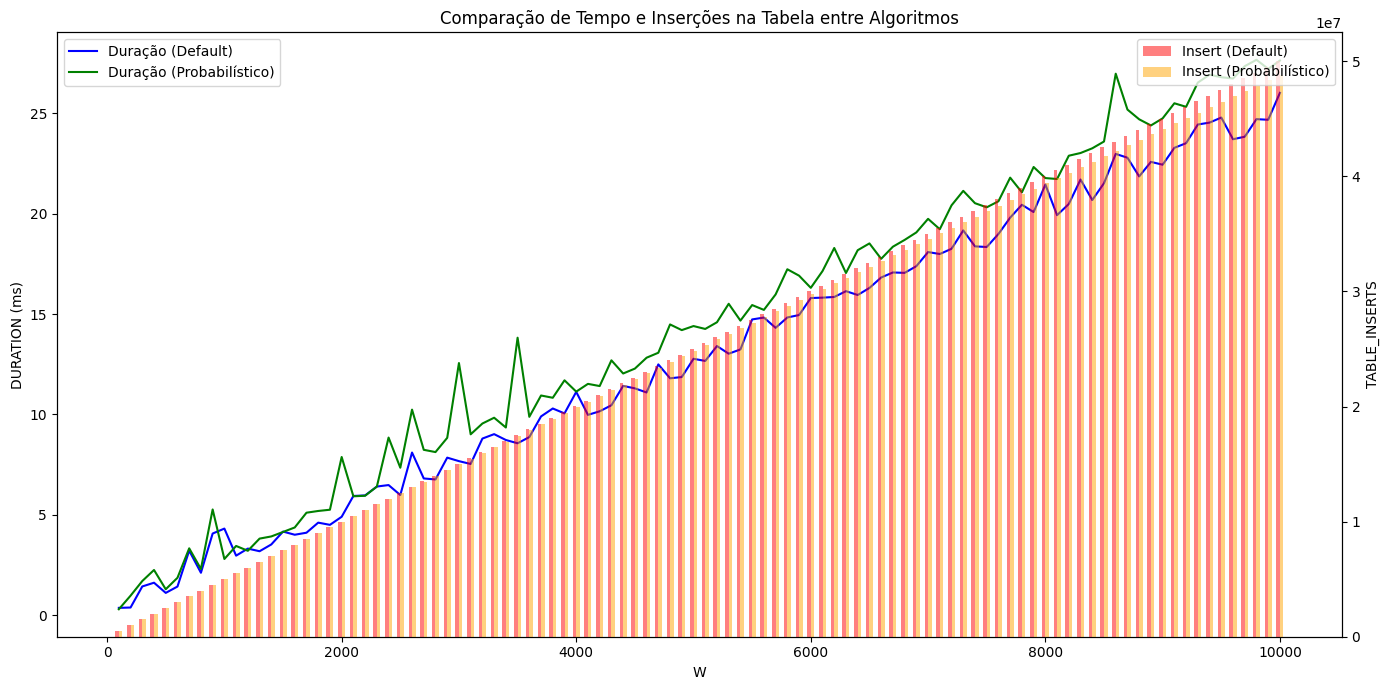

In [32]:
# Carrega os CSVs
df_default = pd.read_csv("results/eficiency/var_W/default.csv")
df_prob = pd.read_csv("results/eficiency/var_W/probability.csv")

# Limpa colunas
df_default.columns = df_default.columns.str.strip()
df_prob.columns = df_prob.columns.str.strip()

# Converte duração para milissegundos
df_default['DURATION'] *= 1000
df_prob['DURATION'] *= 1000

# Ordena por W
df_default.sort_values(by="W", inplace=True)
df_prob.sort_values(by="W", inplace=True)

# Usa W como base para o eixo X
x = df_default["W"]
bar_width = 30  # Ajuste para não sobrepor as barras

# Cria o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Curvas de duração
ax1.plot(x, df_default['DURATION'], label='Duração (Default)', color='blue')
ax1.plot(x, df_prob['DURATION'], label='Duração (Probabilístico)', color='green')
ax1.set_xlabel('W')
ax1.set_ylabel('DURATION (ms)', color='black')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Eixo secundário para inserções
ax2 = ax1.twinx()
ax2.bar(x - bar_width/2, df_default['TABLE_INSERTS'], width=bar_width, alpha=0.5, label='Insert (Default)', color='red')
ax2.bar(x + bar_width/2, df_prob['TABLE_INSERTS'], width=bar_width, alpha=0.5, label='Insert (Probabilístico)', color='orange')
ax2.set_ylabel('TABLE_INSERTS', color='black')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

plt.title('Comparação de Tempo e Inserções na Tabela entre Algoritmos')
fig.tight_layout()
plt.show()

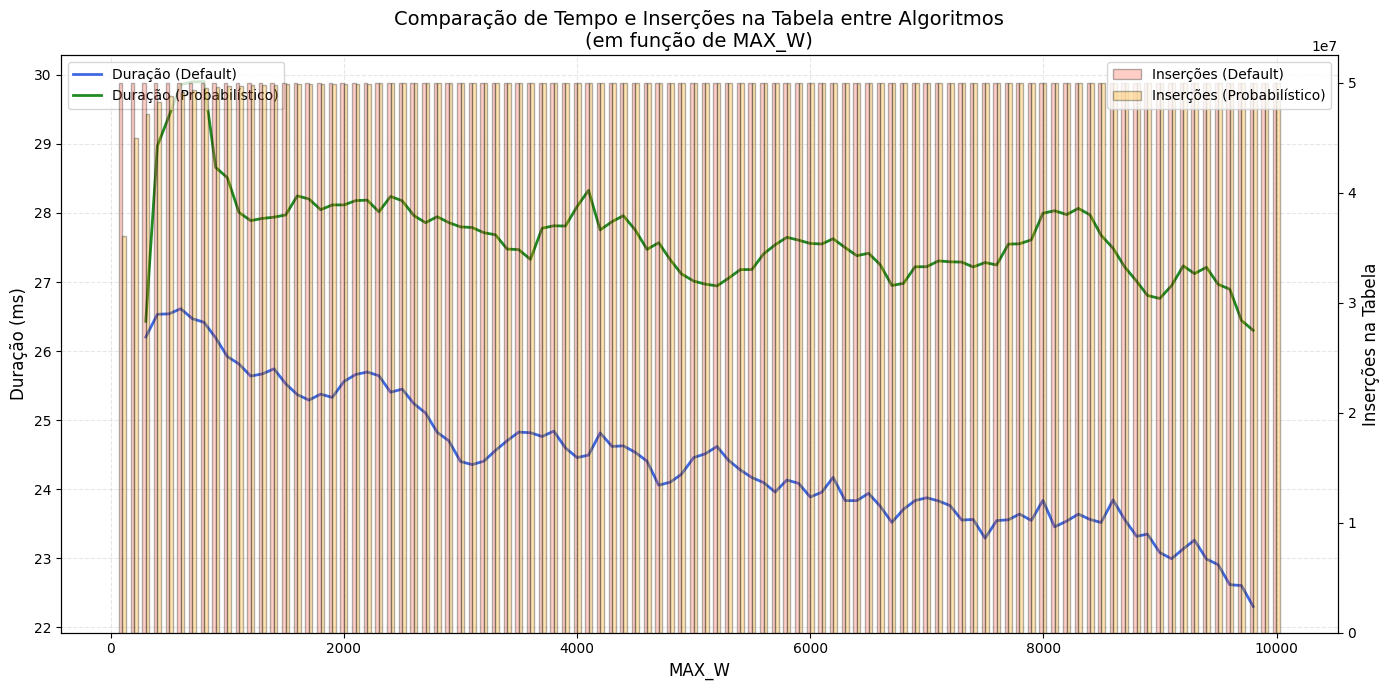

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Carrega os CSVs
df_default = pd.read_csv("results/eficiency/var_Wmax/default.csv")
df_prob = pd.read_csv("results/eficiency/var_Wmax/probability.csv")

# Limpa colunas
df_default.columns = df_default.columns.str.strip()
df_prob.columns = df_prob.columns.str.strip()

# Converte duração para milissegundos
df_default['DURATION'] *= 1000
df_prob['DURATION'] *= 1000

# Ordena por MAX_W
df_default.sort_values(by="MAX_W", inplace=True)
df_prob.sort_values(by="MAX_W", inplace=True)

# Suaviza as curvas (rolling window)
df_default['DURATION_SMOOTH'] = df_default['DURATION'].rolling(window=5, center=True).mean()
df_prob['DURATION_SMOOTH'] = df_prob['DURATION'].rolling(window=5, center=True).mean()

# Configurações básicas
x = df_default["MAX_W"]
bar_width = 30

# Cria figura
fig, ax1 = plt.subplots(figsize=(14, 7))

# Grade leve
ax1.grid(True, linestyle='--', alpha=0.3)

# Curvas de duração suavizadas
ax1.plot(x, df_default['DURATION_SMOOTH'], label='Duração (Default)', color='royalblue', linewidth=2)
ax1.plot(x, df_prob['DURATION_SMOOTH'], label='Duração (Probabilístico)', color='forestgreen', linewidth=2)
ax1.set_xlabel('MAX_W', fontsize=12)
ax1.set_ylabel('Duração (ms)', fontsize=12)
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Destaque para o pico do algoritmo probabilístico
max_idx = df_prob['DURATION'].idxmax()
max_x = df_prob.loc[max_idx, 'MAX_W']
max_y = df_prob.loc[max_idx, 'DURATION']
ax1.annotate(f'{max_y:.1f} ms',
             xy=(max_x, max_y),
             xytext=(max_x + 500, max_y + 2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, color='black')

# Eixo secundário: inserções
ax2 = ax1.twinx()
ax2.bar(x - bar_width/2, df_default['TABLE_INSERTS'], width=bar_width,
        alpha=0.3, label='Inserções (Default)', color='tomato', edgecolor='black')
ax2.bar(x + bar_width/2, df_prob['TABLE_INSERTS'], width=bar_width,
        alpha=0.3, label='Inserções (Probabilístico)', color='orange', edgecolor='black')
ax2.set_ylabel('Inserções na Tabela', fontsize=12)
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Título
plt.title('Comparação de Tempo e Inserções na Tabela entre Algoritmos\n(em função de MAX_W)', fontsize=14)

# Ajusta layout
fig.tight_layout()
plt.show()


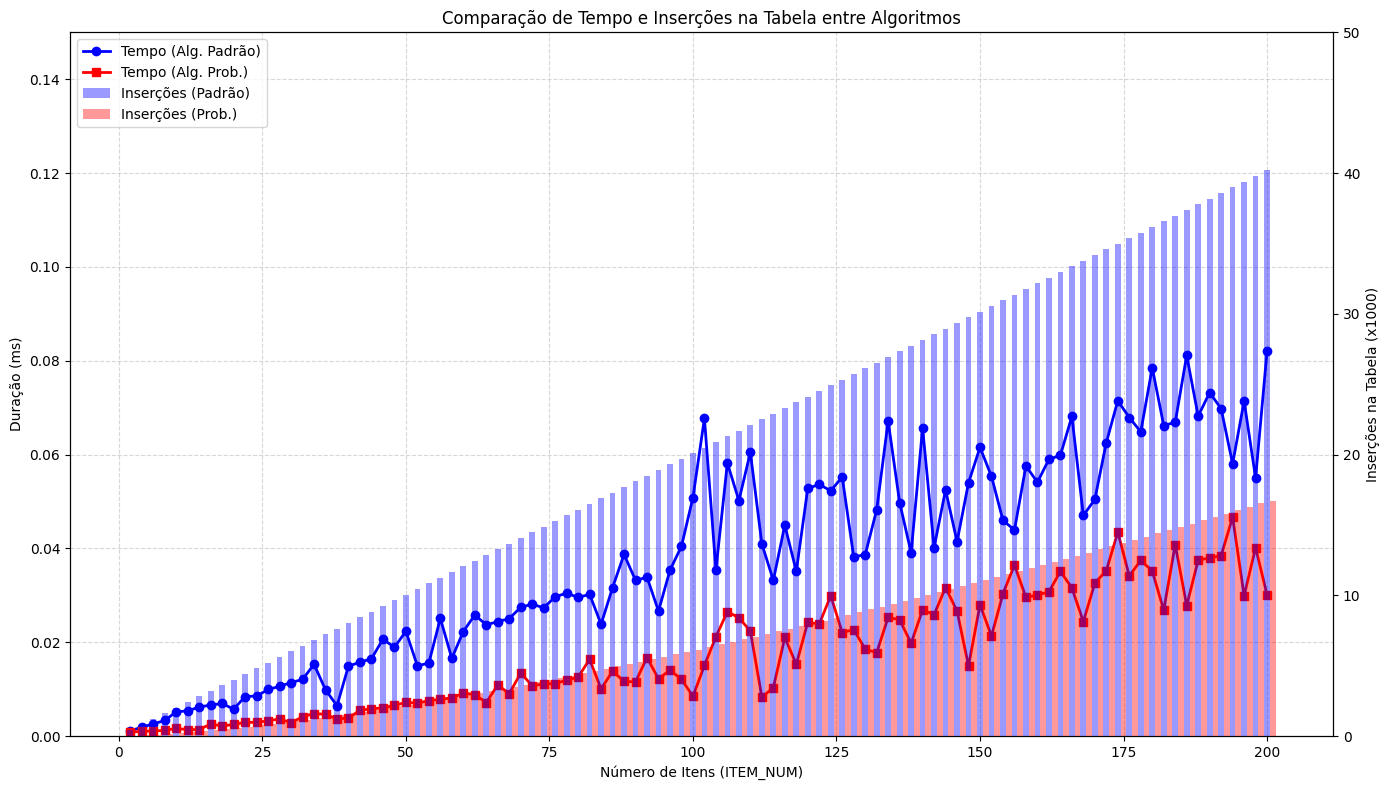

In [34]:

# Carrega os CSVs
df_default = pd.read_csv("results/eficiency/var_N(small)/default.csv")
df_prob = pd.read_csv("results/eficiency/var_N(small)/probability.csv")

# Limpa e prepara os dados
df_default.columns = df_default.columns.str.strip()
df_prob.columns = df_prob.columns.str.strip()
df_default.sort_values(by="ITEM_NUM", inplace=True)
df_prob.sort_values(by="ITEM_NUM", inplace=True)

# Converte duração para milissegundos e ajusta a escala
df_default['DURATION'] = df_default['DURATION'] * 1000  # segundos para ms
df_prob['DURATION'] = df_prob['DURATION'] * 1000

# Normaliza as inserções para melhor visualização
scale_factor = 1000  # Mostrar em milhares
df_default['TABLE_INSERTS'] = df_default['TABLE_INSERTS'] / scale_factor
df_prob['TABLE_INSERTS'] = df_prob['TABLE_INSERTS'] / scale_factor

# Configuração do gráfico
plt.figure(figsize=(14, 8))
x = df_default["ITEM_NUM"]
bar_width = 1

# Gráfico de linhas para duração
line1, = plt.plot(x, df_default['DURATION'], 'b-o', linewidth=2)
line2, = plt.plot(x, df_prob['DURATION'], 'r-s', linewidth=2)
plt.xlabel('Número de Itens (ITEM_NUM)')
plt.ylabel('Duração (ms)', color='black')
plt.ylim(0, 0.15)
plt.grid(True, linestyle='--', alpha=0.5)

# Gráfico de barras para inserções (eixo secundário)
plt.twinx()
bar1 = plt.bar(x, df_default['TABLE_INSERTS'], width=bar_width, alpha=0.4, color='blue')
bar2 = plt.bar(x + bar_width, df_prob['TABLE_INSERTS'], width=bar_width, alpha=0.4, color='red')
plt.ylabel(f'Inserções na Tabela (x{scale_factor})', color='black')
plt.ylim(0, 50)

# Legendas personalizadas
plt.legend([line1, line2, bar1, bar2], 
           ['Tempo (Alg. Padrão)', 'Tempo (Alg. Prob.)', 
            'Inserções (Padrão)', 'Inserções (Prob.)'],
           loc='upper left')

plt.title('Comparação de Tempo e Inserções na Tabela entre Algoritmos')
plt.tight_layout()
plt.show()


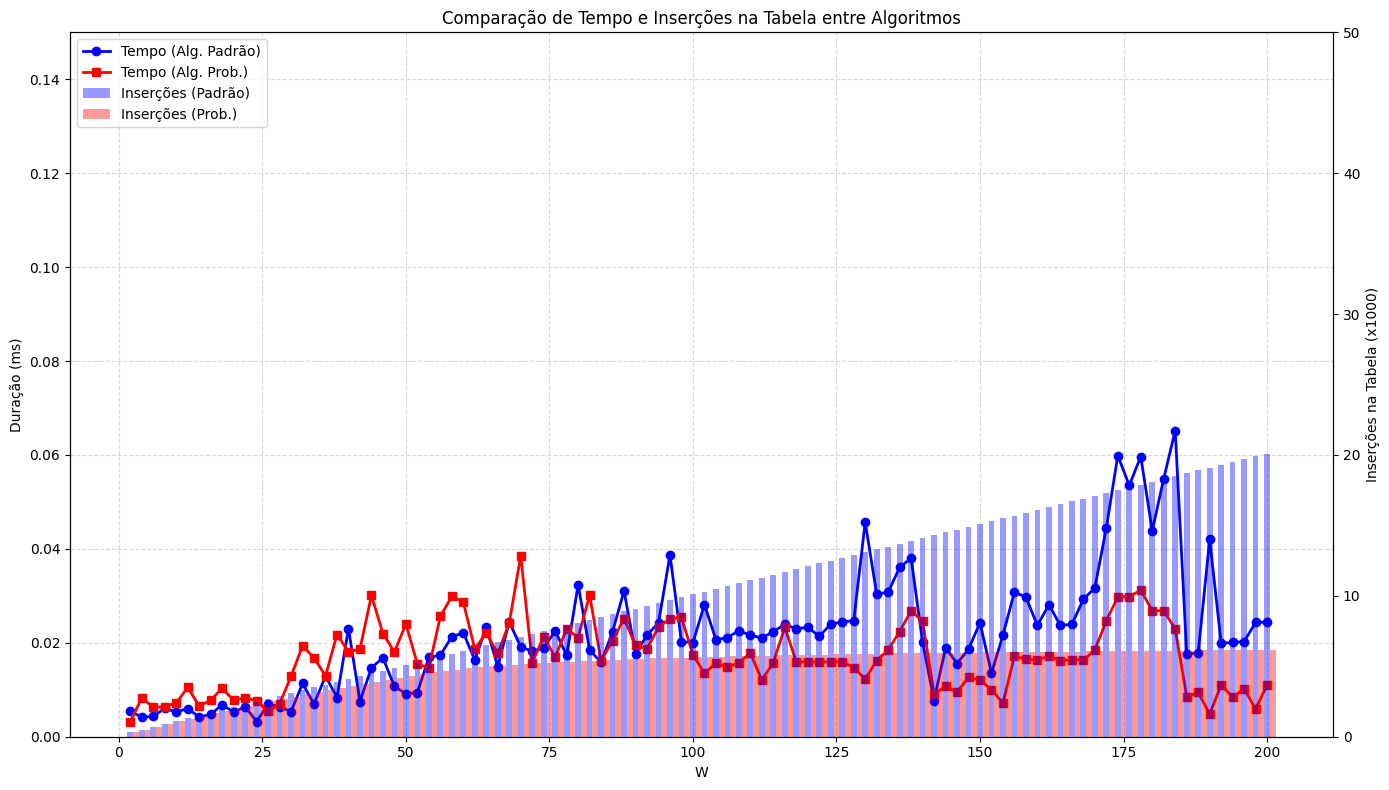

In [35]:
# Carrega os CSVs
df_default = pd.read_csv("results/eficiency/var_W(small)/default.csv")
df_prob = pd.read_csv("results/eficiency/var_W(small)/probability.csv")

# Limpa e prepara os dados
df_default.columns = df_default.columns.str.strip()
df_prob.columns = df_prob.columns.str.strip()
df_default.sort_values(by="W", inplace=True)
df_prob.sort_values(by="W", inplace=True)

# Converte duração para milissegundos e ajusta a escala
df_default['DURATION'] = df_default['DURATION'] * 1000  # segundos para ms
df_prob['DURATION'] = df_prob['DURATION'] * 1000

# Normaliza as inserções para melhor visualização
scale_factor = 1000  # Mostrar em milhares
df_default['TABLE_INSERTS'] = df_default['TABLE_INSERTS'] / scale_factor
df_prob['TABLE_INSERTS'] = df_prob['TABLE_INSERTS'] / scale_factor

# Configuração do gráfico
plt.figure(figsize=(14, 8))
x = df_default["W"]
bar_width = 1

# Gráfico de linhas para duração
line1, = plt.plot(x, df_default['DURATION'], 'b-o', linewidth=2)
line2, = plt.plot(x, df_prob['DURATION'], 'r-s', linewidth=2)
plt.xlabel('W')
plt.ylabel('Duração (ms)', color='black')
plt.ylim(0, 0.15)
plt.grid(True, linestyle='--', alpha=0.5)

# Gráfico de barras para inserções (eixo secundário)
plt.twinx()
bar1 = plt.bar(x, df_default['TABLE_INSERTS'], width=bar_width, alpha=0.4, color='blue')
bar2 = plt.bar(x + bar_width, df_prob['TABLE_INSERTS'], width=bar_width, alpha=0.4, color='red')
plt.ylabel(f'Inserções na Tabela (x{scale_factor})', color='black')
plt.ylim(0, 50)

# Legendas personalizadas
plt.legend([line1, line2, bar1, bar2], 
           ['Tempo (Alg. Padrão)', 'Tempo (Alg. Prob.)', 
            'Inserções (Padrão)', 'Inserções (Prob.)'],
           loc='upper left')

plt.title('Comparação de Tempo e Inserções na Tabela entre Algoritmos')
plt.tight_layout()
plt.show()


In [39]:
# Carregar os dados
df = pd.read_csv('results/success_prob/binary_mode.csv')

# Calcular a probabilidade de sucesso
total_execucoes = len(df)
sucessos = df['OPT'].sum()
probabilidade_sucesso = sucessos / total_execucoes

print(f"Probabilidade de sucesso binary: {probabilidade_sucesso:.2%}")

df = pd.read_csv('results/success_prob/normal_dist.csv')

# Calcular a probabilidade de sucesso
total_execucoes = len(df)
sucessos = df['OPT'].sum()
probabilidade_sucesso = sucessos / total_execucoes


print(f"Probabilidade de sucesso normal dist: {probabilidade_sucesso:.2%}")

df = pd.read_csv('results/success_prob/normal_mode.csv')

# Calcular a probabilidade de sucesso
total_execucoes = len(df)
sucessos = df['OPT'].sum()
probabilidade_sucesso = sucessos / total_execucoes


print(f"Probabilidade de sucesso normal_queue: {probabilidade_sucesso:.2%}")


Probabilidade de sucesso binary: 45.00%
Probabilidade de sucesso normal dist: 100.00%
Probabilidade de sucesso normal_queue: 66.00%
